In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
allData = np.genfromtxt('visc_vs_time.txt')
data = allData[:,1]
time = allData[:,0]

In [8]:
def Block_Average(data,Max_block_Size):
    block_Mean = np.zeros(Max_block_Size)
    block_Var = np.zeros(Max_block_Size)
    block_sig = np.zeros(Max_block_Size)
    block_Err = np.zeros(Max_block_Size)
    Size = np.arange(1,Max_block_Size+1)
    for block_Size in Size:
        Nb = int(len(data)/block_Size)
        b_mean = np.zeros(Nb)
        for j in range(1,Nb+1):
            ibeg = (j-1) * block_Size
            iend =  ibeg + block_Size
            b_mean[j-1] = np.mean(data[ibeg:iend])
        block_Mean[block_Size-1] = np.mean(b_mean)
        block_Var[block_Size-1] = np.var(b_mean)/(Nb-1)
        block_sig[block_Size-1] = np.sqrt(block_Var[block_Size-1])
        block_Err[block_Size-1] = block_sig[block_Size-1]/np.sqrt(Nb)
    return Size,block_Mean,block_sig,block_Err

In [13]:
Max_block_Size = 2
size,b_mean,b_sig,b_err = Block_Average(data,Max_block_Size)

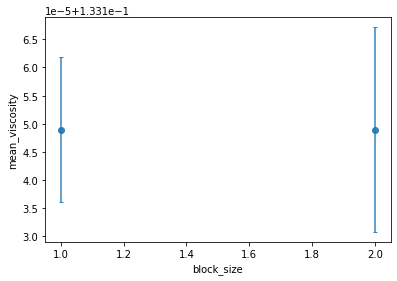

In [15]:
fig = plt.figure()
ax = fig.add_axes([0.15,0.15,0.80,0.78])
ax.errorbar(size,b_mean,yerr = b_sig,fmt = 'o',capsize = 2,alpha = 0.9)
plt.xlabel('block_size')
plt.ylabel('mean_viscosity')
plt.savefig('blockaverage_test.png')
plt.show()